# Reflect Tables into SQLAlchemy ORM

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd


import datetime as dt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import MetaData, Table #added tool
from sqlalchemy import Column, Date, Integer, Float, String #added tool
from sqlalchemy.ext.declarative import declarative_base #added tool
import sqlite3 as sq #added tool

#Terms
#tobs :https://judithcurry.com/2015/02/22/understanding-time-of-observation-bias/#:~:text=TOBs%20adjustments%20increase%20the%20amount,adjusted%20temperatures%20reported%20by%20NCDC.


In [2]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite") #establish the SQLite database

In [3]:
#What databases are visible
print(engine.table_names())

['hawaii', 'measurement', 'station']


In [4]:
#confirm that the database is structured like the CSV (1/3)
metadata =MetaData()
hawaii = Table('hawaii', metadata, autoload=True, autoload_with=engine)

print(repr(hawaii))


Table('hawaii', MetaData(bind=None), Column('id_x', BIGINT(), table=<hawaii>), Column('station', TEXT(), table=<hawaii>), Column('date', TEXT(), table=<hawaii>), Column('prcp', FLOAT(), table=<hawaii>), Column('tobs', FLOAT(), table=<hawaii>), Column('id_y', BIGINT(), table=<hawaii>), Column('name', TEXT(), table=<hawaii>), Column('latitude', FLOAT(), table=<hawaii>), Column('longitude', FLOAT(), table=<hawaii>), Column('elevation', FLOAT(), table=<hawaii>), schema=None)


In [5]:
#confirm that the database is structured like the CSV (2/3)
metadata =MetaData()
measure = Table('measurement', metadata, autoload=True, autoload_with=engine)

print(repr(measure))


Table('measurement', MetaData(bind=None), Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False), Column('station', TEXT(), table=<measurement>), Column('date', TEXT(), table=<measurement>), Column('prcp', FLOAT(), table=<measurement>), Column('tobs', FLOAT(), table=<measurement>), schema=None)


In [6]:
#confirm that the database is structured like the CSV (3/3)
metadata =MetaData()
station = Table('station', metadata, autoload=True, autoload_with=engine)

print(repr(station))


Table('station', MetaData(bind=None), Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False), Column('station', TEXT(), table=<station>), Column('name', TEXT(), table=<station>), Column('latitude', FLOAT(), table=<station>), Column('longitude', FLOAT(), table=<station>), Column('elevation', FLOAT(), table=<station>), schema=None)


In [7]:
#confirm the data in each CSV
test = engine.execute("select * from station")
for record in test:
    print(record)


(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
(3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
(4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)
(5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)
(6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
(7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)
(8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9)
(9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)


In [8]:
#Create a connection
conn = engine.connect()
conn
#makes some object (see below)

In [9]:
#feed into pd.readsql 1/3

station = pd.read_sql("select * from station", conn)
station.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [10]:
measure = pd.read_sql("select * from measurement", conn)
measure.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [11]:
hawaii_sqlite = pd.read_sql("select * from hawaii", conn)
hawaii_sqlite.head()
#hawaii.sqlite still empty (when first ran through CSVs. Once dataframe is made and uploaded to sqlite, it will populate.)

,id_x,station,date,prcp,tobs,id_y,name,latitude,longitude,elevation
0,1,USC00519397,2010-01-01,0.08,65.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00519397,2010-01-02,0.00,63.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
2,3,USC00519397,2010-01-03,0.00,74.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
3,4,USC00519397,2010-01-04,0.00,76.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
4,5,USC00519397,2010-01-06,NaN,73.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0


In [12]:
# What we know:
    #both CSVs have station IDs
    #the measurement.csv has more than one entry per station ID
    #there are no other column labels to merge on.
    
# what now? Merge station ONTO measure. This will correlate labels and locations based on individual reading as readings 
# from measure are independet valuse based on weather readings. 
    # station = labels (dependent on readings and from where)
    #measure = independent readings 

hawaii = measure.merge(station, on = 'station')    
hawaii

,id_x,station,date,prcp,tobs,id_y,name,latitude,longitude,elevation
0,1,USC00519397,2010-01-01,0.08,65.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00519397,2010-01-02,0.00,63.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
2,3,USC00519397,2010-01-03,0.00,74.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
3,4,USC00519397,2010-01-04,0.00,76.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
4,5,USC00519397,2010-01-06,NaN,73.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
...,...,...,...,...,...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0,9,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
19546,19547,USC00516128,2017-08-20,NaN,78.0,9,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
19547,19548,USC00516128,2017-08-21,0.56,76.0,9,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
19548,19549,USC00516128,2017-08-22,0.50,76.0,9,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4


In [13]:
#now to write it to sqlite db
    # steps outlined on StackOverflow: 
    # https://stackoverflow.com/questions/14431646/how-to-write-pandas-dataframe-to-sqlite-with-index

hawaii.to_sql('hawaii', conn, if_exists = 'replace', index=False)

In [14]:
hawaii_sqlite.head()

,id_x,station,date,prcp,tobs,id_y,name,latitude,longitude,elevation
0,1,USC00519397,2010-01-01,0.08,65.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00519397,2010-01-02,0.00,63.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
2,3,USC00519397,2010-01-03,0.00,74.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
3,4,USC00519397,2010-01-04,0.00,76.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
4,5,USC00519397,2010-01-06,NaN,73.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0


In [15]:
# HW provided roadmap

    # reflect an existing database into a new model

    # reflect the tables

    # We can view all of the classes that automap found

    # Save references to each table

    # Create our session (link) from Python to the DB

# Exploratory Climate Analysis

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

    # Calculate the date 1 year ago from the last data point in the database

    # Perform a query to retrieve the data and precipitation scores

    # Save the query results as a Pandas DataFrame and set the index to the date column

    # Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [17]:
## Design a query to retrieve the last 12 months of precipitation data and plot the results (1/TBD)

#extract data from sqlite db (pretend that we did not just make a df and write it to sqlite).
hawaii_rain = pd.read_sql("select * from hawaii", conn)

#reorder df based on date from most recent to oldest.
hawaii_rain.sort_values('date', ascending=False)


,id_x,station,date,prcp,tobs,id_y,name,latitude,longitude,elevation
19549,19550,USC00516128,2017-08-23,0.45,76.0,9,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
12186,12187,USC00519523,2017-08-23,0.08,82.0,6,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
2723,2724,USC00519397,2017-08-23,0.00,81.0,1,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
7634,7635,USC00514830,2017-08-23,0.00,82.0,3,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
12185,12186,USC00519523,2017-08-22,0.00,82.0,6,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
...,...,...,...,...,...,...,...,...,...,...
14959,14960,USC00511918,2010-01-01,0.05,66.0,8,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
12187,12188,USC00519281,2010-01-01,0.15,70.0,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
9518,9519,USC00519523,2010-01-01,0.15,75.0,6,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
9007,9008,USC00518838,2010-01-01,0.21,72.0,5,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6


In [18]:
## Design a query to retrieve the last 12 months of precipitation data and plot the results (2/TBD)

#Confirm the dtype of 'date' is Date.
hawaii_rain.dtypes

    #it is an object therefore we must convert it to datetime to filter.

id_x           int64
station       object
date          object
prcp         float64
tobs         float64
id_y           int64
name          object
latitude     float64
longitude    float64
elevation    float64
dtype: object

In [19]:
## Design a query to retrieve the last 12 months of precipitation data and plot the results (3/TBD)
#convert our date from a dtype object  to a dtype date.
    # followed steps from:
    #https://datatofish.com/strings-to-datetime-pandas/

hawaii_rain['date'] = pd.to_datetime(hawaii_rain['date'], format='%Y-%m-%d')

hawaii_rain.dtypes
#confirmed that the 'date' column is a datetime dtype

id_x                  int64
station              object
date         datetime64[ns]
prcp                float64
tobs                float64
id_y                  int64
name                 object
latitude            float64
longitude           float64
elevation           float64
dtype: object

In [20]:
## Design a query to retrieve the last 12 months of precipitation data and plot the results (4/TBD)
    # Perform a query to retrieve the data and precipitation scores
    #followed steps from: 
    #https://www.geeksforgeeks.org/how-to-filter-dataframe-rows-based-on-the-date-in-pandas/

hawaii_rain12 = hawaii_rain.loc[
                    (hawaii_rain['date'] >= '2016-08-23')
                    & (hawaii_rain['date'] < '2017-08-24')
]

hawaii_rain12 = hawaii_rain12.sort_values('date', ascending=False)
hawaii_rain12 = hawaii_rain12.drop(['id_x', 'id_y'], axis=1)
hawaii_rain12 = hawaii_rain12.loc[:,['date','station', 'name', 'prcp','tobs','elevation','latitude','longitude']]
hawaii_rain12

,date,station,name,prcp,tobs,elevation,latitude,longitude
19549,2017-08-23,USC00516128,"MANOA LYON ARBO 785.2, HI US",0.45,76.0,152.4,21.33310,-157.80250
12186,2017-08-23,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",0.08,82.0,19.5,21.33556,-157.71139
7634,2017-08-23,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",0.00,82.0,7.0,21.52130,-157.83740
2723,2017-08-23,USC00519397,"WAIKIKI 717.2, HI US",0.00,81.0,3.0,21.27160,-157.81680
12185,2017-08-22,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",0.00,82.0,19.5,21.33556,-157.71139
...,...,...,...,...,...,...,...,...
5090,2016-08-23,USC00513117,"KANEOHE 838.1, HI US",0.15,76.0,14.6,21.42340,-157.80150
19201,2016-08-23,USC00516128,"MANOA LYON ARBO 785.2, HI US",0.70,74.0,152.4,21.33310,-157.80250
11850,2016-08-23,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",0.02,80.0,19.5,21.33556,-157.71139
8824,2016-08-23,USC00517948,"PEARL CITY, HI US",NaN,80.0,11.9,21.39340,-157.97510


In [21]:
## Design a query to retrieve the last 12 months of precipitation data and plot the results (5/TBD)
    # Save the query results as a Pandas DataFrame and set the index to the date column
    # Sort the dataframe by date

hawaii_precip12 = hawaii_rain12.loc[:,['date', 'prcp']]
# hawaii_precip12.set_index('date')
hawaii_precip12.reset_index(drop=True, inplace=True)
hawaii_precip12

,date,prcp
0,2017-08-23,0.45
1,2017-08-23,0.08
2,2017-08-23,0.00
3,2017-08-23,0.00
4,2017-08-22,0.00
...,...,...
2225,2016-08-23,0.15
2226,2016-08-23,0.70
2227,2016-08-23,0.02
2228,2016-08-23,NaN


<function matplotlib.pyplot.show(close=None, block=None)>

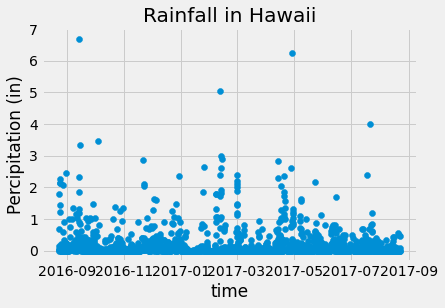

In [24]:
## Design a query to retrieve the last 12 months of precipitation data and plot the results (6/TBD)
    # Use Pandas Plotting with Matplotlib to plot the data
        #eliminate NaN
hawaii_precip12 = hawaii_precip12.dropna()
hawaii_precip12.reset_index(drop=True, inplace=True)
hawaii_precip12


x_axis = hawaii_precip12['date']
y_axis = hawaii_precip12['prcp']

plt.scatter(x_axis, y_axis)
plt.xlabel("time")
plt.ylabel("Percipitation (in)")
plt.title ("Rainfall in Hawaii" )
plt.show


In [35]:
#separate the data based on months and make a bar graph for average rainfall per 'Month-Year'
# hawaii_rain12 = hawaii_rain.loc[
#                     (hawaii_rain['date'] >= '2016-08-23')
#                     & (hawaii_rain['date'] < '2017-08-24')
# ]


hawaii_rain12= hawaii_rain12.dropna()

aug_2017 = hawaii_rain12.loc[
                    (hawaii_rain['date'] >= '2017-08-01')
                    & (hawaii_rain['date'] < '2017-08-31')
]
aug_2017['tobs'].mean()

july_2017 = hawaii_rain12.loc[
                    (hawaii_rain['date'] >= '2017-07-01')
                    & (hawaii_rain['date'] < '2017-07-30')
]
july_2017['tobs'].mean()


# june_2017
# may_2017
# april_2017
# march_2017
# feb_2017
# jan_2017
# dec_2016
# nov_2016
# oct_2016
# sept_2016
# aug_2016


78.90123456790124

In [ ]:
# create the bins
bin = [0, 10, 15, 20, 25, 30, 35, 40, 10000000
       2017-08-01,
       2017-07-01,
       2017-06-01,
       2017-05-01,
       2017-04-01,
       2017-03-01,
       2017-02-01,
       2017-01-01,
       2016-12-01,
       2016-11-01,
       2016-10-01,
       2016-09-01,
       2016-08-01,
      
      ]
group_names = [
            "aug_2017"
            "june_2017",
            "may_2017",
            "april_2017",
            "march_2017",
            "feb_2017",
            "jan_2017",
            "dec_2016",
            "nov_2016",
            "oct_2016",
            "sept_2016",
            "aug_2016"
              ]

age_df = hawaii_rain12.loc[:,['date', 'prcp']]
# age_df = age_df.drop_duplicates()

age_df['Bin'] = pd.cut(age_df['Age'], bin, labels = group_names, right=False, include_lowest=True)

del age_df["SN"]

age_df = age_df.groupby(['Bin']).agg(['count'])
age_total_df = age_df.sum()

age_df = age_df.rename(columns={
    "Age":"Total Count",
    "count":"",
    })

age_df.insert(1, "Percentage of Players" , ((age_df['Total Count']/age_df['Total Count'].sum())*100).map("{:.2f}%".format), True)

age_df

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data

In [ ]:
# Design a query to show how many stations are available in this dataset?


In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
